# <center>Machine Learning Project</center>

** **
## <center>*01 - Exploratory Data Analysis & Preprocessing*</center>

** **

The members of the `team` are:
- Ana Farinha - 20211514
- Francisco Capontes - 20211692
- Maria Cruz - 20230760
- Sofia Gomes - 20240848
- Tahiya Laboni - 20240943


## <span style="color:salmon"> Description of the project  </span> 

The New York Workers’ Compensation Board (WCB) administers and regulates workers’ compensation, disability, volunteer firefighters, volunteer ambulance workers, and volunteer civil defence workers’ benefits. As the regulating authority, the WCB is responsible for assembling and deciding on claims whenever it becomes aware of a workplace injury. Since 2000, the WCB has assembled and reviewed more than 5 million claims.

However, manually reviewing all claims is an arduous and time-consuming process. For that reason, the WCB has reached out to Nova IMS to assist them in the creation of a model that can automate the decision-making whenever a new claim is received.

## <span style="color:salmon"> Table of contents  </span> 

1. [Importing Libraries & Data](#1-import-libraries--data) <br><br>  

2. [Explore Data Analysis](#2-explore-data-analysis) <br>  
    2.1 [Duplicates](#21-duplicates) <br>  
    2.2 [Explore Data](#22-explore-dataset) <br>  
    2.3 [Numerical Variables](#23-numerical-variables) <br>  
    2.4 [Categorical Variables](#24-categorical-variables) <br><br>  

3. [Clean and Pre-processing](#3-clean-and-pre-processing) <br>  
    3.1 [Data Types](#31-data-types) <br>  
    3.2 [Missing Values](#32-missing-values) <br>  
    3.3 [Incoherencies](#33-incoherencies) <br>  
    3.4 [Outliers](#34-outliers) <br>  
    3.5 [Visualizations](#35-visualizations) <br>  
    3.5.1 [Numerical Variables](#351-numerical-variables) <br>  
    3.5.2 [Categorical Variables](#352-categorical-variables) <br><br>  

4. [Feature selection]() <br><br>  

5. [Models]() <br><br>  

## <span style="color:salmon"> 1. Import Libraries & Data  </span> 

In [82]:
import pandas as pd
import numpy as np
from scipy import stats

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

from utils import *

In [83]:
df = pd.read_csv('./project_data/train_data.csv')
df

/var/folders/9b/jd3m9d1938sb3269cy5k5rzh0000gn/T/ipykernel_75309/1657859846.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./project_data/train_data.csv')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,...,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <span style="color:salmon"> 2. Explore Data Analysis  </span> 

#### <span style="color:salmon"> 2.1 Duplicates </span> 

This dataset contains a variable called `Claim Identifier` which should be unique to each injuty claim / row. 

In [84]:
# Search for duplicated 'Claim Identifier'
df['Claim Identifier'].duplicated().sum()

1

Above, it can be verified the existence of wo rows with the sam `Claim Identifier`. TO better understand why that happened, below the rows with the same id can be seen.

In [85]:
# Check for duplicated values in 'Claim Identifier'
duplicated_claims = df['Claim Identifier'].duplicated(keep=False)

df[duplicated_claims]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
257901,NaN,NaN,NaN,2021-05-21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526445,NaN,NaN,NaN,2022-09-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The rows are almost empty so we decided to drop these two. Afterwards, the possibility of existing similar rows almost empty will be explored.

In [86]:
df.drop_duplicates(subset='Claim Identifier', keep='first', inplace=True)

In [87]:
df = df.set_index('Claim Identifier')

After dropping the repeated `Claim Identifier`, the variable was used as index.

Search for duplicated rows

In [88]:
df.duplicated().sum()

18349

Delete all the duplicates

In [89]:
df[df.duplicated(keep=False)]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363651794,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209507552,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970865999,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807753247,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365870975,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327160035,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249875936,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### <span style="color:salmon"> 2.2 Explore Dataset </span> 

In order the understand better the dataset, we can use some function, like:

1. See the first ten lines 

In [90]:
df.head(10)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
5393863,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,...,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0
5393848,2019-12-28,48.0,N,2020-01-01,N,0.00,1971.0,2019-12-31,NaN,LM INSURANCE CORP,...,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,36.0,FINGER(S),13029,0.0,Not Work Related,1.0
5394182,2019-12-30,33.0,N,2020-01-01,N,0.00,1986.0,2019-12-31,2020-03-04,STATE INSURANCE FUND,...,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",38.0,SHOULDER(S),10305,0.0,Not Work Related,6.0
5393881,2019-12-23,55.0,N,2020-01-01,N,0.00,1964.0,2020-01-01,NaN,"ROCHESTER, UNIVERSITY OF",...,99.0,"OTHER - MISCELLANEOUS, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",60.0,LUNGS,14620,0.0,Not Work Related,6.0


2. To get information about the index dtype and columns, non-null values and memory usage:

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593470 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593470 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

3. Get number of lines and columns

In [92]:
df.shape

(593470, 32)

To understand the statistics of the variable, we can divide in categorical and numerical:

#### <span style="color:salmon"> 2.3 Numerical Variables </span> 

Numerical variables represent measurable quantities and can be analyzed mathematically. <br>  
The numerical variables that exist in this dataset are:

In [93]:
numerical_df = df.select_dtypes(include='number')
numerical_df

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,
5393875,31.0,0.00,1988.0,NaN,44.0,NaN,27.0,10.0,62.0,0.0,1.0
5393091,46.0,1745.93,1973.0,4.0,23.0,NaN,97.0,49.0,38.0,1.0,4.0
5393889,40.0,1434.80,1979.0,NaN,56.0,NaN,79.0,7.0,10.0,0.0,6.0
957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,61.0,NaN,1958.0,NaN,62.0,NaN,16.0,43.0,36.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
327160035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6165075,72.0,0.00,1950.0,NaN,48.0,NaN,25.0,90.0,-9.0,0.0,3.0
249875936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Show some statistics about the numerical_df:

In [94]:
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.114270,14.256432,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.088321,6092.918120,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.645305,19.644175,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,54.381143,25.874281,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.013839,22.207521,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.738146,22.365940,-9.0,33.0,38.0,53.0,99.0
Agreement Reached,574026.0,0.046665,0.210921,0.0,0.0,0.0,0.0,1.0


#### <span style="color:salmon"> 2.4 Categorical Variables </span> 

Categorical variables represent characteristics or qualities that group data into distinct categories or labels. <br>  
In this dataset, the categorical variables are:

In [95]:
categorical_df = df.loc[:,(df.dtypes == 'object') == True]
categorical_df

,Accident Date,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,...,District Name,First Hearing Date,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,N,2020-01-01,N,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,...,SYRACUSE,NaN,M,RETAIL TRADE,I,FROM LIQUID OR GREASE SPILLS,CONTUSION,BUTTOCKS,13662,Not Work Related
5393091,2019-08-30,N,2020-01-01,Y,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,...,ROCHESTER,2020-02-21,F,CONSTRUCTION,I,REPETITIVE MOTION,SPRAIN OR TEAR,SHOULDER(S),14569,Not Work Related
5393889,2019-12-06,N,2020-01-01,N,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,...,ALBANY,NaN,M,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,OBJECT BEING LIFTED OR HANDLED,CONCUSSION,MULTIPLE HEAD INJURY,12589,Not Work Related
957648180,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,N,2020-01-01,N,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,...,ALBANY,NaN,M,HEALTH CARE AND SOCIAL ASSISTANCE,II,"HAND TOOL, UTENSIL; NOT POWERED",PUNCTURE,FINGER(S),12603,Not Work Related
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327160035,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6165075,2022-12-13,N,2022-12-31,N,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,2. NON-COMP,SULLIVAN,...,BINGHAMTON,NaN,F,TRANSPORTATION AND WAREHOUSING,I,FROM DIFFERENT LEVEL (ELEVATION),MULTIPLE PHYSICAL INJURIES ONLY,MULTIPLE,12779,Not Work Related
249875936,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Show some statistics about the categorical_df:

In [96]:
categorical_df.describe().T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593470,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


## <span style="color:salmon"> 3. Clean and pre-processing  </span> 

#### <span style="color:salmon"> 3.1 Data Types </span> 

To see the types of each columns of the dataset

In [97]:
df.dtypes

Accident Date                          object
Age at Injury                         float64
Alternative Dispute Resolution         object
Assembly Date                          object
Attorney/Representative                object
Average Weekly Wage                   float64
Birth Year                            float64
C-2 Date                               object
C-3 Date                               object
Carrier Name                           object
Carrier Type                           object
Claim Injury Type                      object
County of Injury                       object
COVID-19 Indicator                     object
District Name                          object
First Hearing Date                     object
Gender                                 object
IME-4 Count                           float64
Industry Code                         float64
Industry Code Description              object
Medical Fee Region                     object
OIICS Nature of Injury Description

Above, it can be seen that the dates are considered objects while they should be considered dates. Additionally, the variables hat are codes should be considered strings not floats.

*Change date columns data type:*

In [98]:
# Select date columns
date_cols = df.columns[df.columns.str.contains('Date')]
# Transform into date using pandas
df[date_cols] = df[date_cols].apply(pd.to_datetime)

*Change code columns to strings:*

In [99]:
# Select code columns
code_cols = df.columns[df.columns.str.contains('Code')]
# Transform code columns to float
df[code_cols] = df[code_cols].astype('str')

Also, the data type of the column "Age at Injury" and "Birth Year" is float, and we have to change to int

In [100]:
df['Birth Year'] = pd.to_numeric(df['Birth Year'], errors='coerce').astype('Int64')

df['Age at Injury'] = pd.to_numeric(df['Age at Injury'], errors='coerce').astype('Int64')

In [101]:
### ver se acabam .0
## "column" % 10

#### <span style="color:salmon"> 3.2 Missing Values </span> 
#### <span style="color:yellow"> ACABAR E METER MELHOR </span> 

Using the method `.info()`, it was already verified that several variables have missing values. One that sood out was the target variable `Claim Injury Type`.

In [102]:
df[df['Claim Injury Type'].isna()].isna().sum()

Accident Date                         19444
Age at Injury                         19444
Alternative Dispute Resolution        19444
Assembly Date                             0
Attorney/Representative               19444
Average Weekly Wage                   19444
Birth Year                            19444
C-2 Date                              19444
C-3 Date                              19444
Carrier Name                          19444
Carrier Type                          19444
Claim Injury Type                     19444
County of Injury                      19444
COVID-19 Indicator                    19444
District Name                         19444
First Hearing Date                    19444
Gender                                19444
IME-4 Count                           19444
Industry Code                             0
Industry Code Description                 0
Medical Fee Region                    19444
OIICS Nature of Injury Description    19444
WCIO Cause of Injury Code       

Above, it can be checked that the majority of the missing values all belong to the same rows which have no target. As such, it was decided to remove those rows.

In [103]:
# Remove rows with no target
df.dropna(subset=['Claim Injury Type'], inplace = True)

The next step, was to explore the remaining missing values.

In [104]:
# Calculate the percentage of null values per column
# Mean calculates the propotion
null_percentage = df.isnull().mean() * 100

# Convert the result to a DataFrame for better readability
null_percentage_df = null_percentage.reset_index()
null_percentage_df.columns = ['Column', 'Null Percentage']

null_percentage_df # Before making decisions, check which variables can have na following the project description

,Column,Null Percentage
0,Accident Date,0.642654
1,Age at Injury,0.000000
2,Alternative Dispute Resolution,0.000000
3,Assembly Date,0.000000
4,Attorney/Representative,0.000000
5,Average Weekly Wage,4.991237
6,Birth Year,5.065624
7,C-2 Date,2.536470
8,C-3 Date,67.380397
9,Carrier Name,0.000000


Remove rows that have almost no elements 

In [105]:
df = df[df[['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution']].any(axis=1)]

Remove column 'OIICS Nature of Injury Description' because only have NAN values

In [106]:
df = df.drop(columns=['OIICS Nature of Injury Description'])

#### <span style="color:salmon">  3.3 Incoherencies </span> 
#### <span style="color:yellow"> ACABAR </span> 

1. There is some "Birth date" equal to 0. This values should became NAN values.

In [107]:
df['Birth Year'] = df['Birth Year'].replace(0, np.nan)

2. The C-2 Date should always be first than C-3 Date, so we need to eliminate the lines that have C-2 bigger than C-3

In [108]:
print(df[df['C-2 Date'] > df['C-3 Date']])

                 Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5393898             2019-12-18             29                              N   
5393984             2019-12-16             49                              N   
5393901             2019-11-13             33                              N   
5394036             2019-12-23             42                              N   
5394169             2019-11-14             28                              N   
...                        ...            ...                            ...   
6164443             2022-12-12             23                              N   
6164364             2022-11-23             30                              N   
6164612             2022-12-12             53                              N   
6165390             2022-10-24             37                              N   
6164934             2022-12-19          

3. "Person Age" shoud be greather than "Age at injury"

In [109]:
df['Person Age'] = 2022 - df['Birth Year']

In [110]:
print(df[df['Age at Injury'] > df['Person Age']])

                 Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5651750             2023-08-23             62                              N   
5919352             2023-09-11             59                              N   
5985232             2023-05-05             39                              N   
6041297             2023-05-24             50                              N   
6052753             2023-02-07             37                              N   
6059336             2023-08-07             36                              N   
6073571             2023-07-20             64                              N   
6090914             2023-03-01             57                              N   
6104241             2023-04-06             53                              N   
6106922             2023-09-29             47                              N   
6158000             2022-12-19          

#### <span style="color:salmon"> 3.4 Outliers </span> 
#### <span style="color:yellow"> FAZER </span> 

#### <span style="color:salmon"> 3.5 Visualizations </span> 

To have a better perspective, we use graphics, and we use the divided dataset with numerical variables and categorical varibales

##### <span style="color:salmon"> 3.5.1 Numerical Variables </span> 

1. In order to look for relationships between descriptive variables, we create a correlation matriz

##### <span style="color:yellow"> VER OS VALORES </span> 

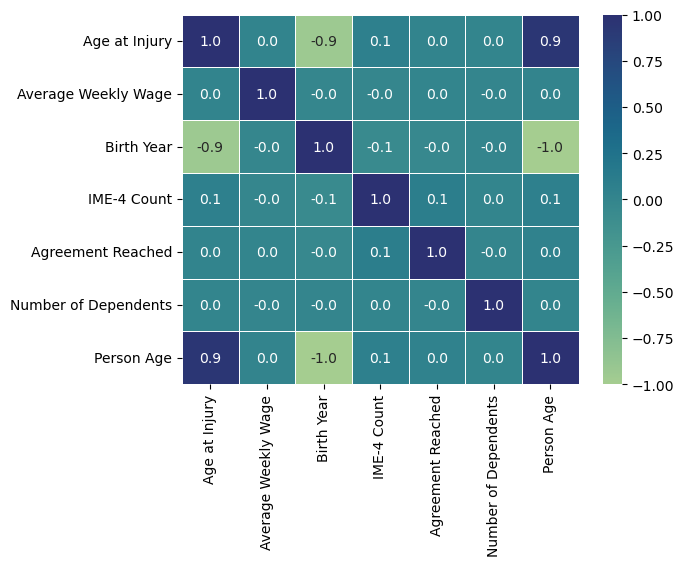

In [111]:
correlation_matrix = numerical_df = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidth=.5, cmap="crest")
plt.show()

2. Show a table with some statistics about the numerical_df, so we can take conclusion about it:

In [112]:
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,7.0,0.157627,0.658154,-0.940139,0.008329,0.019079,0.503894,1.0
Average Weekly Wage,7.0,0.144655,0.377322,-0.013118,-0.004610,0.005610,0.014657,1.0
Birth Year,7.0,-0.152645,0.674258,-1.000000,-0.504218,-0.046344,-0.006868,1.0
IME-4 Count,7.0,0.164366,0.372634,-0.068296,-0.004038,0.067650,0.079641,1.0
Agreement Reached,7.0,0.159355,0.373098,-0.046344,0.002711,0.019079,0.068665,1.0
Number of Dependents,7.0,0.142746,0.378014,-0.001098,-0.000403,0.000046,0.000539,1.0
Person Age,7.0,0.152645,0.674258,-1.000000,0.006868,0.046344,0.504218,1.0


3. Conclusions About Numerical Variables
### <span style="color:yellow"> ACABAR </span> 

- **Age at Injury**: 
    - Mean age is 42.11 years with a standard deviation of 14.26
    - The ages range from 0 to 117 years, with the 25th percentile at 31, the median at 42, and the 75th percentile at 54
    - 75% of the people has 54 age at injury
- **Average Weekly Wage**: 
    - Mean weekly wage is 491.09 with a very high standard deviation of 6092.92
    - The wages range from 0 to a maximum of 2,828,079
    - 75% have an average weekly wage of 841
- **Birth Year**: 
    - The mean birth year is around 1886.77 with a standard deviation of 414.64
- **IME-4 Count**: 
    - Mean count is 3.21 with a standard deviation of 2.83
- **Agreement Reached**: 
    - something
- **Number of Dependents**: 
    - something



##### <span style="color:salmon"> 3.5.2 Categorical Variables </span> 

The next step involves exploring the categorical variables, mainly through visualization.

**1. See unique values**

To facilitate the exploration of the categorical data, the second step taken was to see the unique values that each categorical variable has.

In [113]:
# Check unique values of the categorical variables
for column in categorical_df.columns:
    print('=========================')
    print(categorical_df[column].value_counts())
    print(f'Missing values: {categorical_df[column].isna().sum()}')
    print('=========================')
    print()

Accident Date
2020-03-01    1245
2020-12-18    1001
2022-02-07     977
2022-01-05     883
2021-02-18     851
              ... 
2023-01-09       1
2017-06-20       1
2017-11-07       1
1993-09-30       1
2008-04-29       1
Name: count, Length: 5539, dtype: int64
Missing values: 23133

Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64
Missing values: 19444

Assembly Date
2020-03-06    1422
2021-05-11    1386
2022-04-01    1256
2022-02-04    1217
2022-08-15    1170
              ... 
2021-12-19      10
2020-08-23      10
2022-05-08      10
2021-01-16      10
2022-07-31      10
Name: count, Length: 1096, dtype: int64
Missing values: 0

Attorney/Representative
N    392291
Y    181735
Name: count, dtype: int64
Missing values: 19444

C-2 Date
2021-05-11    1847
2020-03-05    1348
2021-05-27    1271
2022-08-15    1134
2021-06-22    1081
              ... 
2023-08-06       1
2023-10-16       1
2023-10-04       1
2023-07-12       1
2023-11-23       1
N

**2. Conclusion about Categorical variables**
- **Alternative Dispute Resolution**: 
    - Majority with 'N' (571,412)
    - Minor counts of 'Y' (2,609) and 'U' (5), indicating few unspecified cases
- **Carrier Name**: 
    - Diverse field with *STATE INSURANCE FUND* as the largest category
    - Total of 2,046 unique insurance providers
- **Claim Injury Type**: 
    - Target variable with 8 distinct categories
- **County of Injury**: 
    - 63 unique counties, with significant representation from *SUFFOLK* and *QUEENS*
- **Attorney/Representative**: 
    - Majority of claims without legal representation ('N': 392,291 vs 'Y': 181,735)
- **Gender**: 
    - Gender variable includes unknown values ('U' and 'X'), which will be replaced with 'Unknown'
- **Industry Code Description**: 
    - Significant representation in sectors like *Health Care* and *Public Administration*



**3. Handling unknown values in categorical variables**

*Modifying `Alternative Dispute Resolution`*

Before making any alterations, we decided to check the 5 cases with `U` in the variable `Alternative Disputer Resolution`.

In [114]:
df[df['Alternative Dispute Resolution'] == 'U'].T

Claim Identifier,5582402,6032724,6034607,6108701,6108690
Accident Date,2018-03-12 00:00:00,2021-11-05 00:00:00,2022-07-06 00:00:00,2022-09-01 00:00:00,2022-08-29 00:00:00
Age at Injury,57,56,52,57,55
Alternative Dispute Resolution,U,U,U,U,U
Assembly Date,2020-10-21 00:00:00,2022-07-11 00:00:00,2022-07-13 00:00:00,2022-10-17 00:00:00,2022-10-17 00:00:00
Attorney/Representative,N,N,Y,N,N
Average Weekly Wage,0.0,0.0,0.0,NaN,0.0
Birth Year,1961,1965,1969,1965,1967
C-2 Date,NaT,NaT,NaT,NaT,NaT
C-3 Date,NaT,NaT,2023-03-09 00:00:00,NaT,NaT
Carrier Name,ELECTRICAL EMPLOYERS,ELECTRICAL EMPLOYERS,ELECTRICAL EMPLOYERS,ELECTRICAL EMPLOYERS,ELECTRICAL EMPLOYERS


Above, we can see that we have no data about the injury itself, so we decided to drop these rows.

In [115]:
# Drop rows where 'Alternative Dispute Resolution' is 'U'
df = df[df['Alternative Dispute Resolution'] != 'U']

In [116]:
top_keywords = (
    df['Carrier Name']
    .str.split(expand=True)              # Split the carrier names into separate words
    .stack()                              # Stack into a single column
    .reset_index(drop=True)              # Reset index to clean up the DataFrame
    .str.replace(r',', '', regex=True)   # Remove commas
    .str.replace(r'\.', '', regex=True)   # Remove periods
    .str.replace(r'\bOF\b', '', regex=True)  # Drop "OF" words
    .str.replace(r'&', '', regex=True)    # Drop "&" symbols 
    .str.replace(r'\bINS\b', 'INSURANCE', regex=True)  # Replace "INS" with "INSURANCE"
    .str.replace(r'\bCO\b', 'COMPANY', regex=True)  
    .str.replace(r'\bCORP\b', 'CORPORATION', regex=True) 
    .str.strip()                         # Remove leading/trailing whitespace
)

# Get top 30 keywords, excluding empty strings
top_15_keywords = top_keywords[top_keywords != ''].value_counts().head(15)

# Display the result
print(top_15_keywords)


INSURANCE      334815
COMPANY        199631
STATE          113187
FUND           112653
INDEMNITY       55998
FIRE            48440
CORPORATION     43821
AMERICAN        34672
CASUALTY        30867
NEW             26469
NATIONAL        24813
ZURICH          22512
AMERICA         22214
INC             21859
POLICE          21652
Name: count, dtype: int64


*Modifying `Gender`*

In the `Gender` column, we replaced the values `U` and `X` with `Unknown`. The value `U` typically indicates "unknown" or unspecified gender, while `X` may signify a non-binary identity. By combining these two values into `Unknown`, we simplify the data, making it easier to analyze and interpret.

In [117]:
# Replace 'U' with 'Unknown'
df['Gender'] = df['Gender'].replace({'U': 'Unknown'})
# Replace 'X' with 'Unknown'
df['Gender'] = df['Gender'].replace({'X': 'Unknown'})

In [118]:
# Things to do:

# Compare Carrier Name and Carrier Type
# Whats the difference between Gender = X or Gender = U

In [119]:
'''
Multiclass variable: Decision of the WCB relative to the claim:
“Accident” means that claim refers to workplace accident,
“Occupational Disease” means illness from the workplace. ->
requires WCB deliberation so it is unknown at start of claim.
'''
df['WCB Decision'].unique()

array(['Not Work Related'], dtype=object)

To use the categorical variables, it is necessary to encode them as most models do not accept non-numerical values. With that in mind, several options were explored:
- One-hot encoding:
- Label encoding:
- Target encoding:


**4. Number of injuries per county**

In [120]:
# Example usage:
plot_injuries_by_county(df)

ImportError: The 'read_file' function requires the 'pyogrio' or 'fiona' package, but neither is installed or imports correctly.
Importing fiona resulted in: dlopen(/opt/anaconda3/envs/ML2425/lib/python3.12/site-packages/fiona/_env.cpython-312-darwin.so, 0x0002): Library not loaded: @rpath/libpoppler.126.dylib
  Referenced from: <05BBD4E6-D83E-35E1-8018-5520577D82A9> /opt/anaconda3/envs/ML2425/lib/libgdal.32.3.6.2.dylib
  Reason: tried: '/opt/anaconda3/envs/ML2425/lib/libpoppler.126.dylib' (no such file), '/opt/anaconda3/envs/ML2425/lib/python3.12/site-packages/fiona/../../../libpoppler.126.dylib' (no such file), '/opt/anaconda3/envs/ML2425/lib/python3.12/site-packages/fiona/../../../libpoppler.126.dylib' (no such file), '/opt/anaconda3/envs/ML2425/bin/../lib/libpoppler.126.dylib' (no such file), '/opt/anaconda3/envs/ML2425/bin/../lib/libpoppler.126.dylib' (no such file), '/usr/local/lib/libpoppler.126.dylib' (no such file), '/usr/lib/libpoppler.126.dylib' (no such file, not in dyld cache)
Importing pyogrio resulted in: No module named 'pyogrio'

## <span style="color:salmon"> 4. Feature Selection </span> 

#### <span style="color:salmon"> 4.1 Chi-Squared Test  </span> 

In [121]:
for var in categorical_df.columns:
    TestIndependence(df[var],df['Claim Injury Type'], var)

Accident Date is IMPORTANT for Prediction
Alternative Dispute Resolution is IMPORTANT for Prediction
Assembly Date is IMPORTANT for Prediction
Attorney/Representative is IMPORTANT for Prediction
C-2 Date is IMPORTANT for Prediction
C-3 Date is IMPORTANT for Prediction
Carrier Name is IMPORTANT for Prediction
Carrier Type is IMPORTANT for Prediction
Claim Injury Type is IMPORTANT for Prediction
County of Injury is IMPORTANT for Prediction
COVID-19 Indicator is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
First Hearing Date is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Industry Code Description is IMPORTANT for Prediction
Medical Fee Region is IMPORTANT for Prediction
WCIO Cause of Injury Description is IMPORTANT for Prediction
WCIO Nature of Injury Description is IMPORTANT for Prediction
WCIO Part Of Body Description is IMPORTANT for Prediction
Zip Code is IMPORTANT for Prediction
WCB Decision is NOT an important predictor. (Discard WCB Decision fr